In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [4]:
filename='2020_LoL_esports_match_data_from_OraclesElixir_20221207.csv'
data=pd.read_csv(filename)

data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,118.0,165.0,166.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,98.0,-399.0,150.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,140.0,-409.0,-1837.0,-11.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,135.0,51.0,-401.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,28.0,-233.0,257.0,-8.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df=data[['goldat15','xpat15','csat15','killsat15','barons']].copy()

df.dropna(axis=0,how='any',inplace=True)
df.info()
index_names=df[df['barons']>1].index
df.drop(index_names,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19676 entries, 10 to 118667
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   goldat15   19676 non-null  float64
 1   xpat15     19676 non-null  float64
 2   csat15     19676 non-null  float64
 3   killsat15  19676 non-null  float64
 4   barons     19676 non-null  float64
dtypes: float64(5)
memory usage: 922.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17442 entries, 10 to 118667
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   goldat15   17442 non-null  float64
 1   xpat15     17442 non-null  float64
 2   csat15     17442 non-null  float64
 3   killsat15  17442 non-null  float64
 4   barons     17442 non-null  float64
dtypes: float64(5)
memory usage: 817.6 KB


,goldat15,xpat15,csat15,killsat15,barons
10,21953.0,27219.0,507.0,0.0,1.0
11,22778.0,28884.0,519.0,1.0,0.0
22,21714.0,26869.0,501.0,0.0,0.0
34,24882.0,30349.0,584.0,0.0,1.0
35,22316.0,28252.0,531.0,0.0,0.0


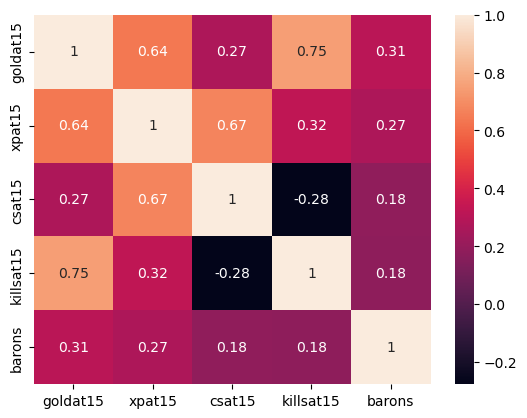

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

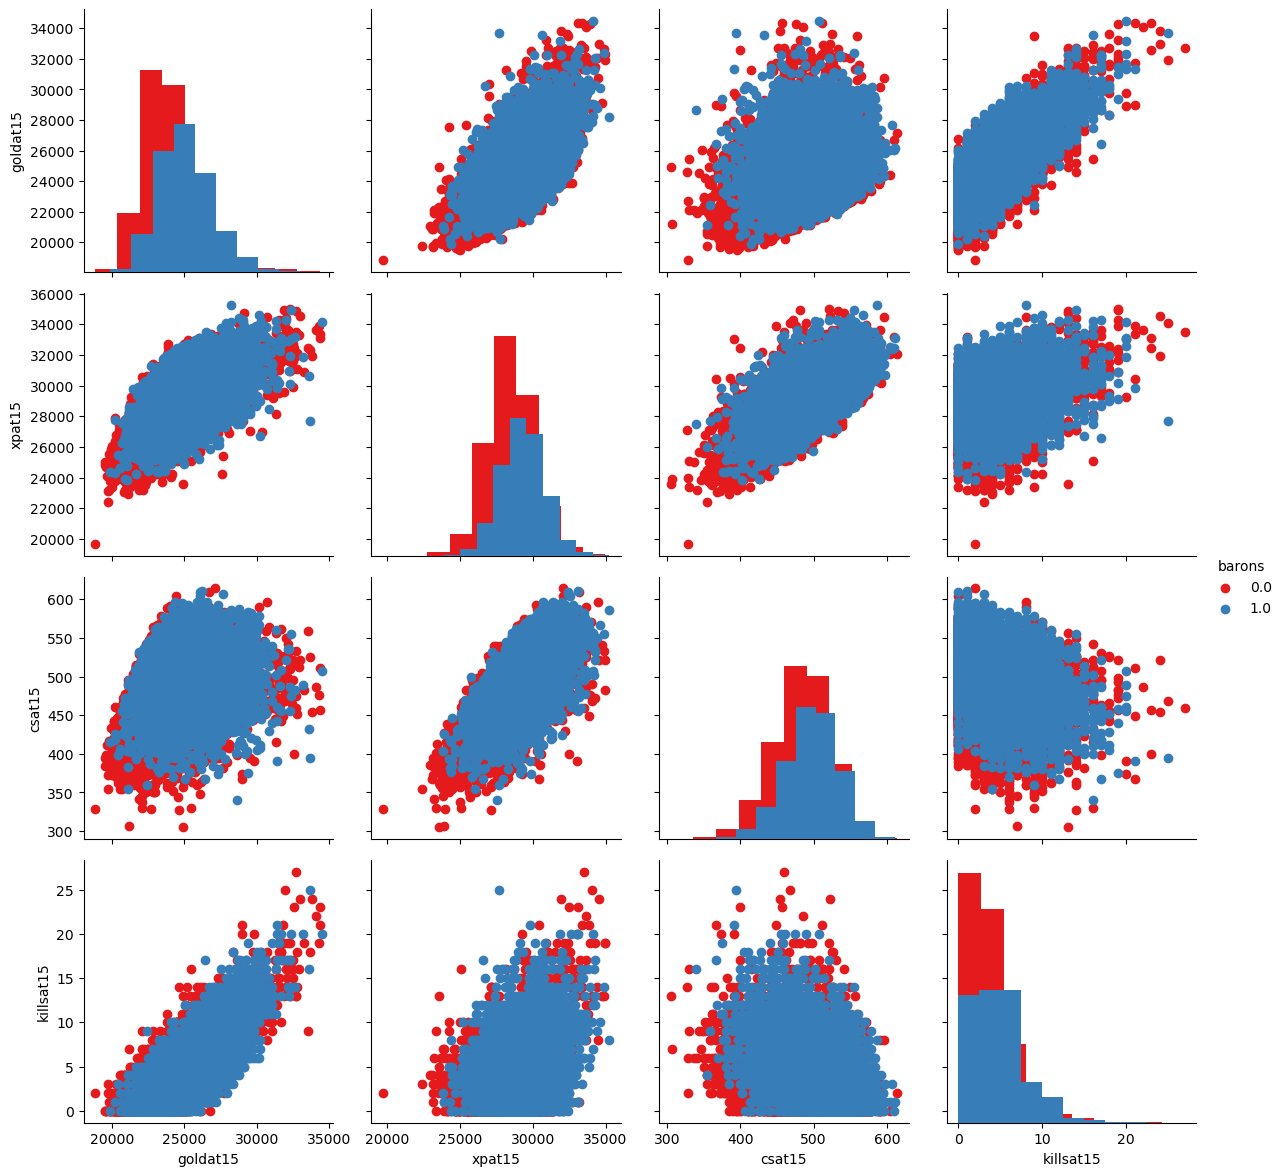

In [7]:
#checking relationship between the 4 features and baron
g = sns.PairGrid(data=df, vars=['goldat15','xpat15','csat15','killsat15'],
             hue='barons',height=3,palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()
 

In [8]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

print(X.shape)
print(y.shape)

(17442, 4)
(17442, 1)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
tree=DecisionTreeClassifier()
model=tree.fit(X_train,y_train)

In [10]:
y_pred=model.predict(X_test)
print(y_pred)

print(y_test)

[0. 1. 1. ... 1. 0. 0.]
        barons
89675      0.0
99647      0.0
39970      0.0
57982      0.0
90083      1.0
...        ...
17555      0.0
102731     1.0
80447      0.0
56770      1.0
30143      0.0

[5233 rows x 1 columns]


In [11]:
len(y_test['barons'].tolist())

5233

In [12]:
len(y_pred)

5233

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))#

              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60      2860
         1.0       0.52      0.51      0.52      2373

    accuracy                           0.56      5233
   macro avg       0.56      0.56      0.56      5233
weighted avg       0.56      0.56      0.56      5233



In [14]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
regr=DecisionTreeClassifier()
model=regr.fit(X_train,y_train)

y_pred=model.predict(X_test)



from sklearn.metrics import classification_report
accscore=classification_report(y_test,y_pred)
print(accscore)


              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61      2868
         1.0       0.52      0.52      0.52      2365

    accuracy                           0.57      5233
   macro avg       0.57      0.57      0.57      5233
weighted avg       0.57      0.57      0.57      5233



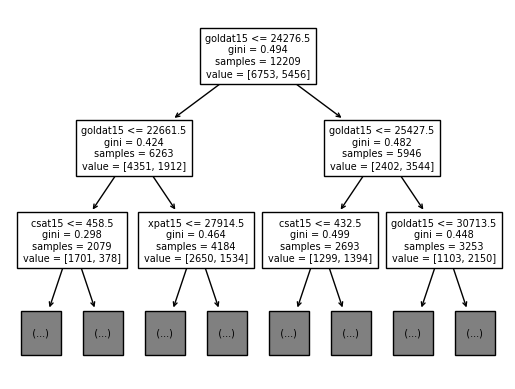

<Figure size 500x500 with 0 Axes>

In [15]:
from sklearn import tree
tree.plot_tree(model,feature_names=['goldat15','xpat15','csat15','killsat15'],
               max_depth=2,fontsize=7)
plt.figure(figsize=(5,5))
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1764, 1104],
       [1147, 1218]])